In [85]:
%pylab inline
import pandas as pd
%ls

Populating the interactive namespace from numpy and matplotlib
Analisis_de_Notas_Herramientas_Secc_2,4,5.ipynb       Notas Totales (copy).ods
gc_201710_FISI2026_02_fullgc_2017-05-21-22-55-12.csv  Notas Totales.ods
gc_201710_FISI2026_04_fullgc_2017-05-21-22-56-24.csv  t3_grupo2.xlsx
gc_201710_FISI2026_05_fullgc_2017-05-21-22-57-20.csv  t3_grupo4.xlsx
Notasss.csv                                           t3_grupo5.xlsx


In [86]:
# Loads grades
data = pd.read_csv("./Notasss.csv", sep = '\t', names=['Tarea3','Tarea8','Tarea9','Diagnostico','Final','Label'])
data.head()

,Tarea3,Tarea8,Tarea9,Diagnostico,Final,Label
0,5.0,5.0,5.0,2.0,6.0,2.0
1,NaN,NaN,NaN,NaN,NaN,2.0
2,5.0,5.0,4.0,2.0,3.0,2.0
3,NaN,NaN,NaN,2.0,NaN,2.0
4,5.0,4.5,3.2,1.0,3.0,2.0


In [87]:
# Fills NaN values as 0 
data = data.fillna(0)
data =  data[['Diagnostico','Tarea3','Tarea8','Tarea9','Final','Label']]
data.head()

,Diagnostico,Tarea3,Tarea8,Tarea9,Final,Label
0,2.0,5.0,5.0,5.0,6.0,2.0
1,0.0,0.0,0.0,0.0,0.0,2.0
2,2.0,5.0,5.0,4.0,3.0,2.0
3,2.0,0.0,0.0,0.0,0.0,2.0
4,1.0,5.0,4.5,3.2,3.0,2.0


In [88]:
# defines 3 different groups
g2 = np.array(data[data.keys()][data['Label']==2].values).astype(np.float64).T
g4 = np.array(data[data.keys()][data['Label']==4].values).astype(np.float64).T
g5 = np.array(data[data.keys()][data['Label']==5].values).astype(np.float64).T
(g4[0])

array([ 1.,  1.,  2.,  0.,  5.,  2.,  2.,  0.,  2.,  3.,  2.,  1.,  1.,
        0.,  2.,  5.,  2.])

# Histogramas de cada nota (Notas en el eje x)

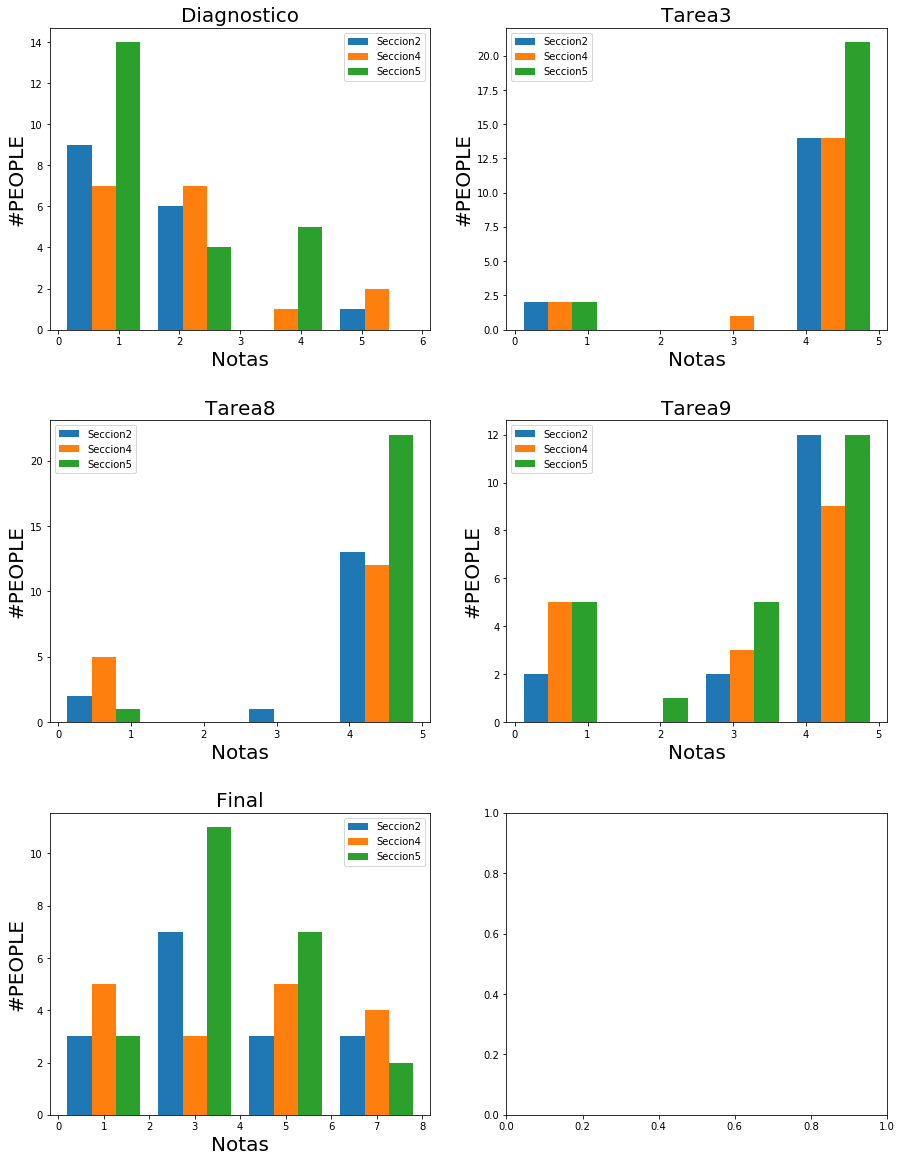

In [105]:
import matplotlib.gridspec as gridspec
import pylab as P
fig, axes = plt.subplots( nrows=3, ncols=2, figsize=(15,20) )
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)
#plt.title( 'Sample of relations in training data' )
gs = gridspec.GridSpec(3,2)
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[0, 1])
ax2 = plt.subplot(gs[1, 0])
ax3 = plt.subplot(gs[1, 1])
ax4 = plt.subplot(gs[2, 0])
axes = [ax0,ax1,ax2,ax3,ax4]
x = P.randn(1000,3)
for i in range(len(g2)-1):
    #print(i)
    ax = axes[i]
    n, bins, patches = ax.hist([g2[i],g4[i],g5[i]], 4, histtype='bar',
                            label=['Seccion2', 'Seccion4', 'Seccion5'])
    ax.legend()
    
    ax.set_xlabel("Notas", fontsize = 20)
    ax.set_title(data.keys()[i], fontsize = 20)
    #ax.set_ylim(-0.1,20)

    ax.set_ylabel("#PEOPLE", fontsize = 20)
    ax.legend()

# Comparacion Diagnostico-Final

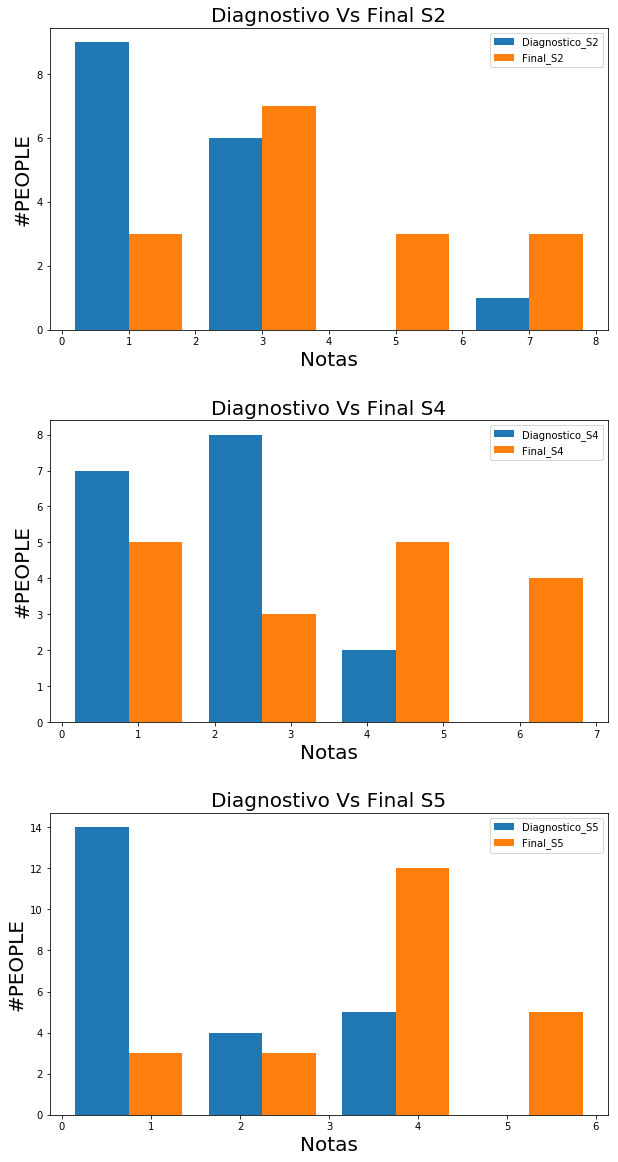

In [104]:
fig, axes = plt.subplots( nrows=3, ncols=1, figsize=(10,20) )
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)
#plt.title( 'Sample of relations in training data' )
gs = gridspec.GridSpec(3,1)
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[1, 0])
ax2 = plt.subplot(gs[2, 0])

n, bins, patches = ax0.hist([g2[0],g2[-2]], 4, histtype='bar',
                            label=['Diagnostico_S2', 'Final_S2'])
ax0.set_xlabel("Notas", fontsize = 20)
ax0.set_title("Diagnostivo Vs Final S2", fontsize = 20)
    #ax.set_ylim(-0.1,20)

ax0.set_ylabel("#PEOPLE", fontsize = 20)
ax0.legend()

n, bins, patches = ax1.hist([g4[0],g4[-2]], 4, histtype='bar',
                            label=['Diagnostico_S4', 'Final_S4'])
ax1.set_xlabel("Notas", fontsize = 20)
ax1.set_title("Diagnostivo Vs Final S4", fontsize = 20)
    #ax.set_ylim(-0.1,20)

ax1.set_ylabel("#PEOPLE", fontsize = 20)
ax1.legend()

n, bins, patches = ax2.hist([g5[0],g5[-2]], 4, histtype='bar',
                            label=['Diagnostico_S5', 'Final_S5'])
ax2.set_xlabel("Notas", fontsize = 20)
ax2.set_title("Diagnostivo Vs Final S5", fontsize = 20)
    #ax.set_ylim(-0.1,20)

ax2.set_ylabel("#PEOPLE", fontsize = 20)
ax2.legend()


# Promedio y desvest de cada clase en cada evaluacion
# Recordar que el parcial final y el  diagnostico son valores sobre 8

Populating the interactive namespace from numpy and matplotlib


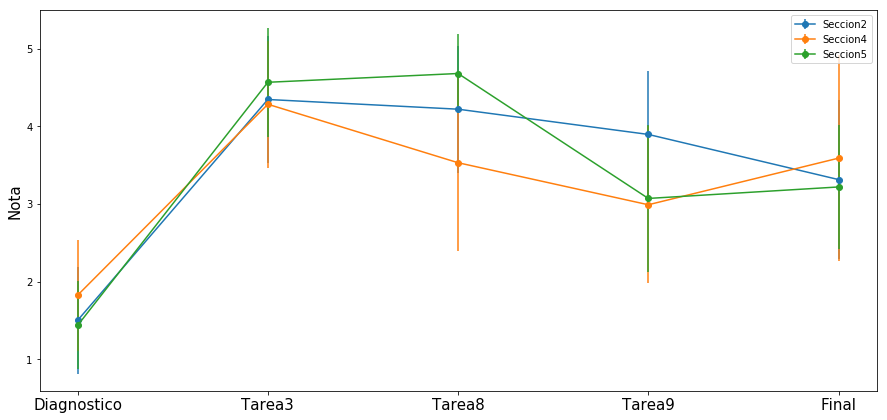

In [125]:
%pylab inline
x = array([1,2,3,4,5])
plt.figure(figsize=(15,7))
xnames = ['Diagnostico','Tarea3','Tarea8','Tarea9','Final']
prom2 = [mean(g2[i]) for i in range(len(g2)-1)]
std2 = 0.5*np.array([std(g2[i]) for i in range(len(g2)-1)])
prom4 = [mean(g4[i]) for i in range(len(g2)-1)]
std4 = 0.5*np.array([std(g4[i]) for i in range(len(g2)-1)])
prom5 = [mean(g5[i]) for i in range(len(g2)-1)]
std5 = 0.5*np.array([std(g5[i]) for i in range(len(g2)-1)])
plt.errorbar(x,prom2,yerr = std2, marker = 'o', label = 'Seccion2')
plt.errorbar(x,prom4,yerr = std4, marker = 'o', label = 'Seccion4')
plt.errorbar(x,prom5,yerr = std5, marker = 'o', label = 'Seccion5')

plt.xticks(x, xnames,fontsize = "15")
plt.ylabel("Nota",fontsize = "15")
plt.legend()
